In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
import os
import cv2



In [ ]:
image_folder = "C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits" 
labels = []
images = []

In [ ]:
for label in range(10):  
    digit_folder = os.path.join(image_folder, str(label))
    for img_name in os.listdir(digit_folder):
        img_path = os.path.join(digit_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))  
        images.append(img)
        labels.append(label)

In [ ]:
X = np.array(images) / 255.0 
y = np.array(labels)


In [ ]:

X = X.reshape(-1, 28 * 28)  
ohe = OneHotEncoder(sparse_output=False)
y = ohe.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

def create_digit_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(784,)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:

print("Training with RMSprop")
rms_model = create_digit_model(RMSprop())
history_rms = rms_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Training with RMSprop
Epoch 1/10


c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5577 - loss: 1.4696 - val_accuracy: 0.8971 - val_loss: 0.4674
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8943 - loss: 0.4292 - val_accuracy: 0.9144 - val_loss: 0.3355
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9172 - loss: 0.3080 - val_accuracy: 0.9405 - val_loss: 0.2346
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9254 - loss: 0.2607 - val_accuracy: 0.9350 - val_loss: 0.2221
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9347 - loss: 0.2274 - val_accuracy: 0.9424 - val_loss: 0.2036
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9387 - loss: 0.2075 - val_accuracy: 0.9424 - val_loss: 0.1949
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9434 - loss: 0.1869 - val_accuracy: 0.9434 - val_loss: 0.1933
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9427 - loss: 0.1902 - val_accuracy: 0.9483 - val_

In [ ]:

print("Training with Adam")
adam_model = create_digit_model(Adam())
history_adam = adam_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Training with Adam
Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5791 - loss: 1.4461 - val_accuracy: 0.8868 - val_loss: 0.5000
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8968 - loss: 0.4492 - val_accuracy: 0.9129 - val_loss: 0.3501
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9149 - loss: 0.3261 - val_accuracy: 0.9345 - val_loss: 0.2769
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9277 - loss: 0.2765 - val_accuracy: 0.9464 - val_loss: 0.2394
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9402 - loss: 0.2420 - val_accuracy: 0.9464 - val_loss: 0.2116
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9469 - loss: 0.2069 - val_accuracy: 0.9449 - val_loss: 0.1982
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9451 - loss: 0.1951 - val_accuracy: 0.9414 - val_loss: 0.1987
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9479 - loss: 0.1917

Text(0.5, 1.0, 'Loss Comparison')

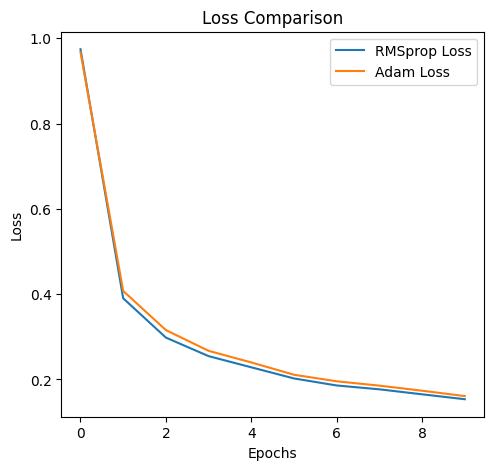

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_rms.history['loss'], label='RMSprop Loss')
plt.plot(history_adam.history['loss'], label='Adam Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison')

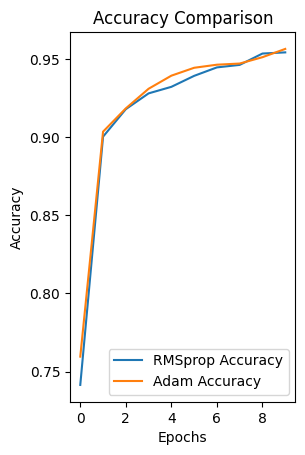

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history_rms.history['accuracy'], label='RMSprop Accuracy')
plt.plot(history_adam.history['accuracy'], label='Adam Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Comparison')

plt.show()

In [ ]:
_, rms_acc = rms_model.evaluate(X_test, y_test)
_, adam_acc = adam_model.evaluate(X_test, y_test)
print(f"Final Accuracy - RMSprop: {rms_acc*100:.2f}%, Adam: {adam_acc*100:.2f}%")

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.9558 - loss: 0.1472
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.9601 - loss: 0.1451
Final Accuracy - RMSprop: 95.08%, Adam: 95.28%
